Description

In [1]:
# data in RNA FISH

# Import Functions and Data 

## Functions

In [1]:
import functions_paper_1
import importlib
from functions_paper_1 import *
exec(open("functions_paper_1.py").read())
# Local path to Sharepoint (on your computer, change if you are a different user)
datadir = Path(Path('../datadir_yb.txt').read_text())
datadir = Path(Path('../../datadir_srk.txt').read_text())
figure_folder = './figs_2024_promoter_editing_paper/fig_RNAFISH/'

## Import Data ##

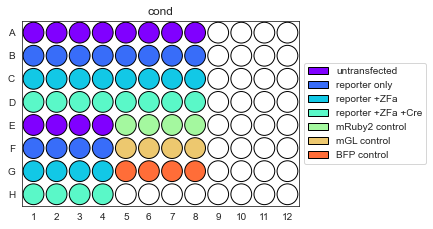

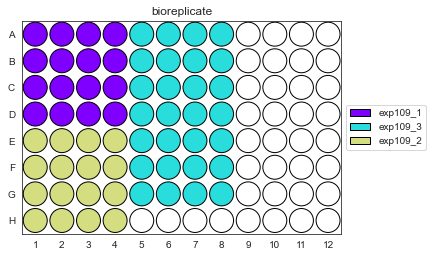

In [2]:
# Import Data1
folder = '2025.06.01_EXP109'
file_path = datadir/'instruments'/'data'/'attune'/'Emma'/folder/'data' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Emma'/folder/'well_metadata.yaml' #Assign yaml paths 
rd.plot.plot_well_metadata(yaml_path)
data1 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data

### Concatanate and add conditions

In [3]:
data = pd.concat( [data1], ignore_index=True, join='inner')

data = data[ data['mRuby2-A'] >0]
data = data[ data['mGL-A'] >0]
data = data[ data['tagBFP-A'] >0]
data = data[ data['AF647-A'] >0]

data['Output mGL protein'] = data['mGL-A']
data['Output mGL mRNA'] = data['AF647-A']

### Gating 

In [4]:
mRuby2gate = 700
data_mRuby2gated = data[ data['mRuby2-A'] > mRuby2gate]
pd.unique(data_mRuby2gated['bioreplicate'])

array(['exp109_1', 'exp109_3', 'exp109_2'], dtype=object)

# Joint Plots and Histograms

## mRuby2 vs. mGL ungated
to figure out optimal gating

'untransfected'

10000


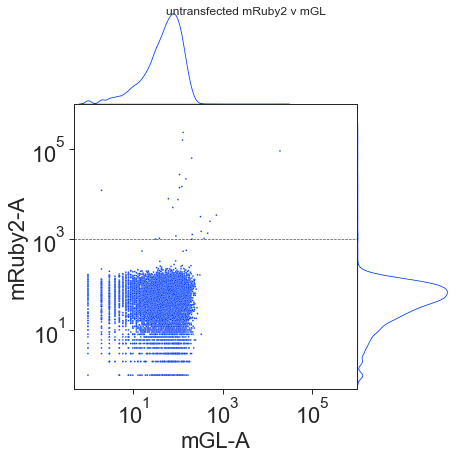

52


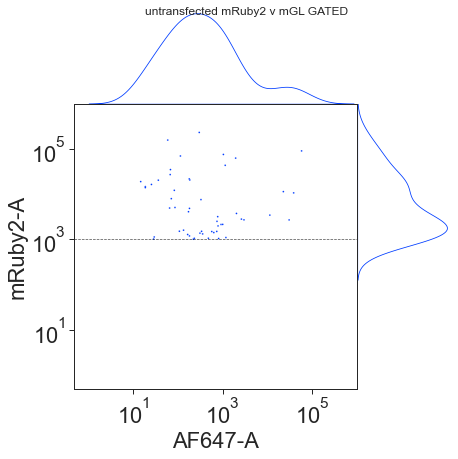

52


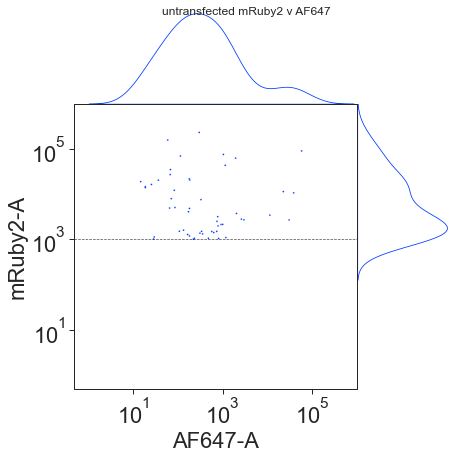

52


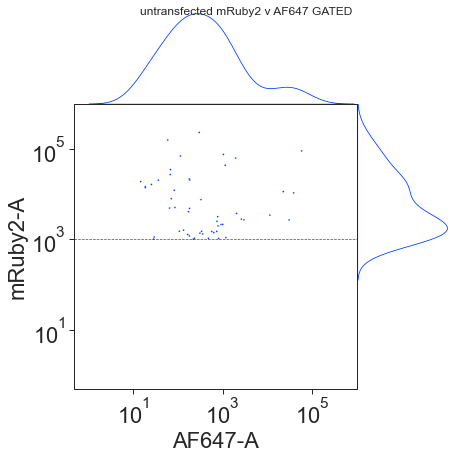

'reporter only'

10000


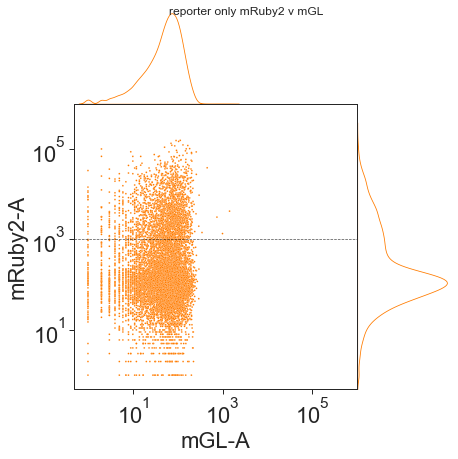

6972


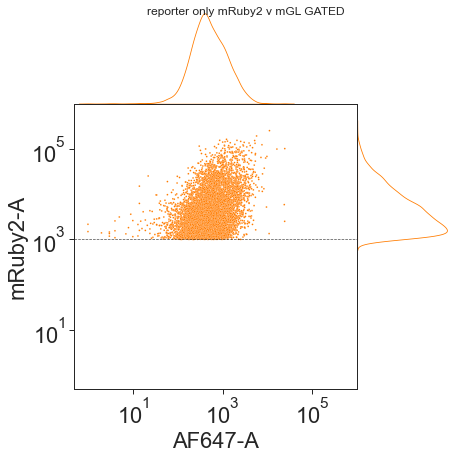

6972


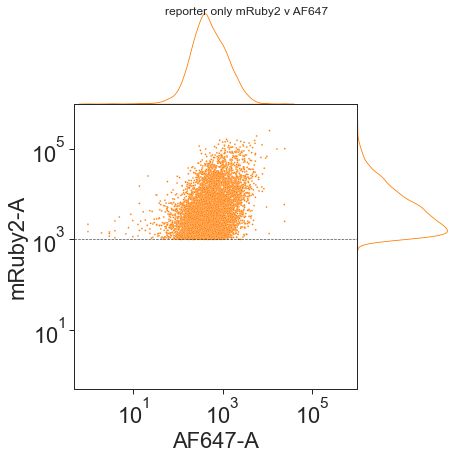

6972


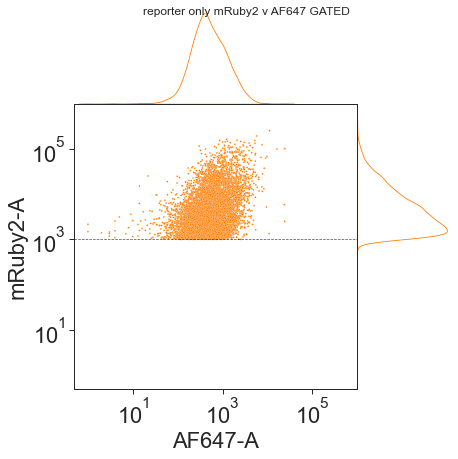

'reporter +ZFa'

10000


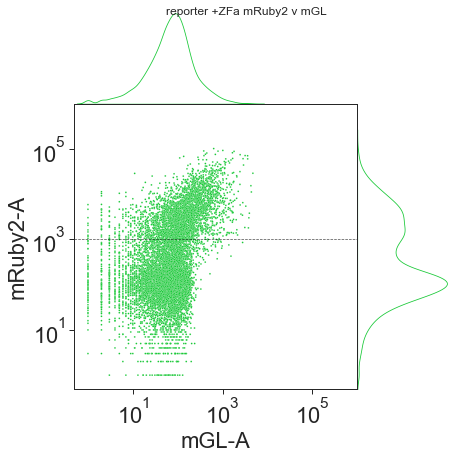

10000


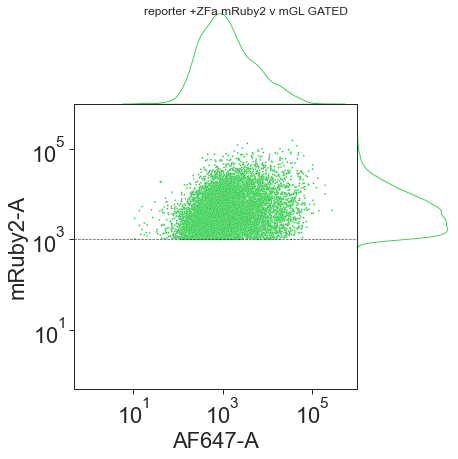

10000


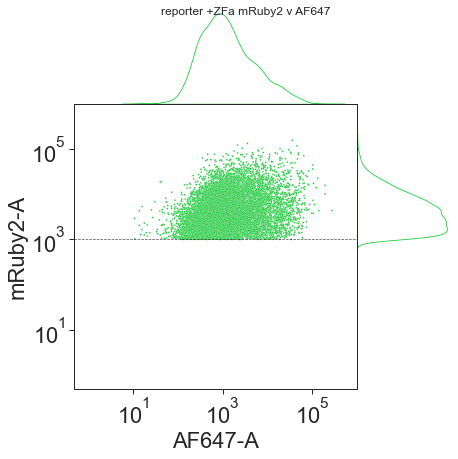

10000


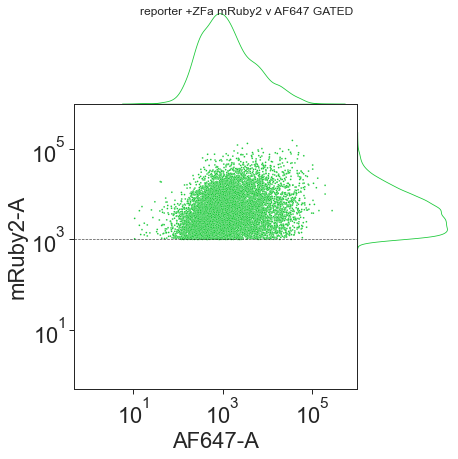

'reporter +ZFa +Cre'

10000


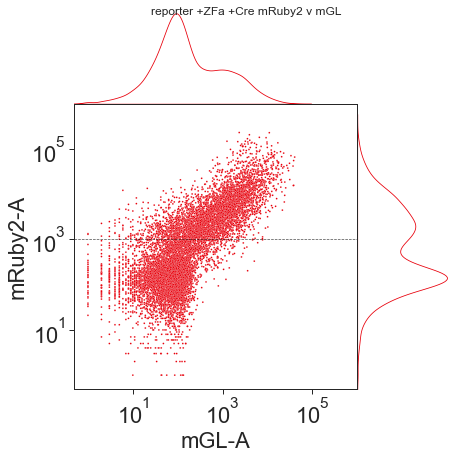

10000


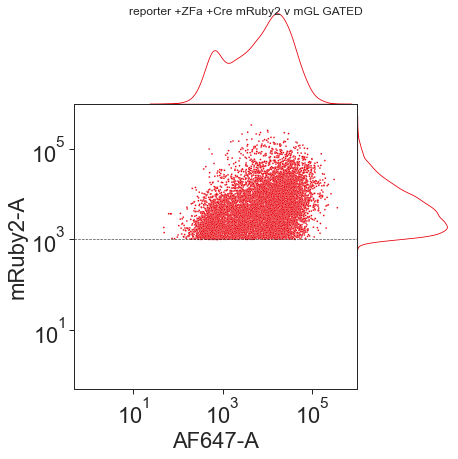

10000


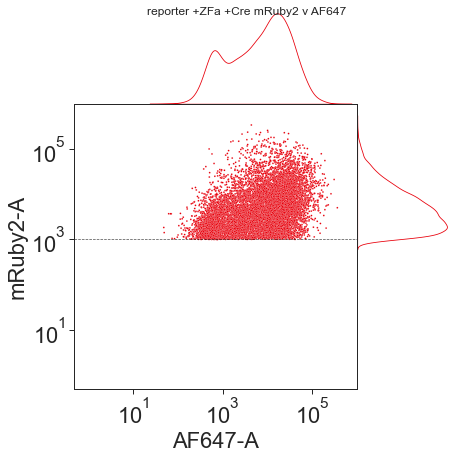

10000


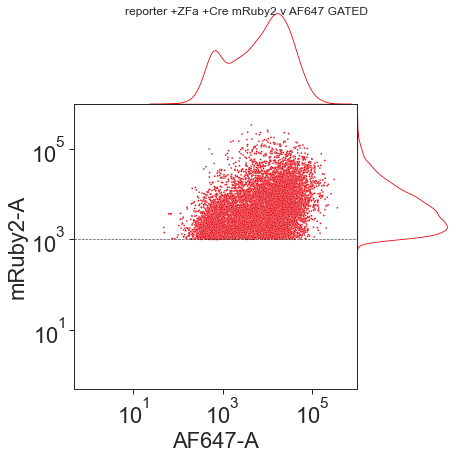

'mRuby2 control'

10000


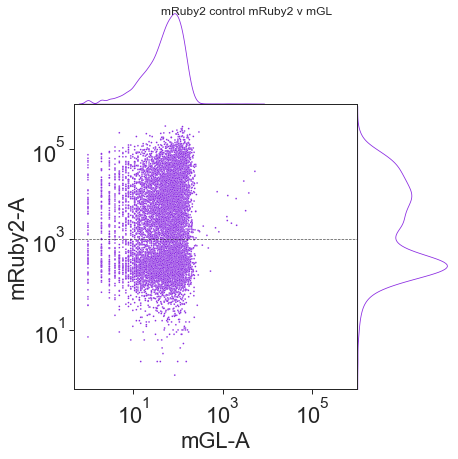

8642


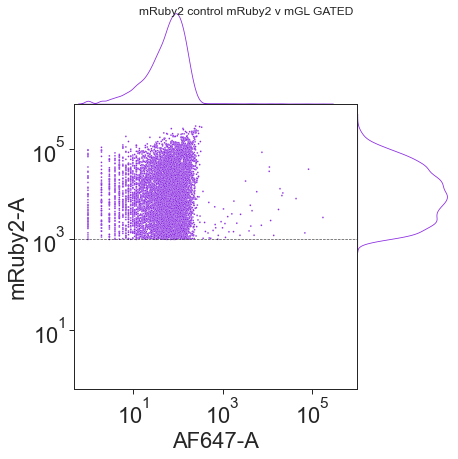

8642


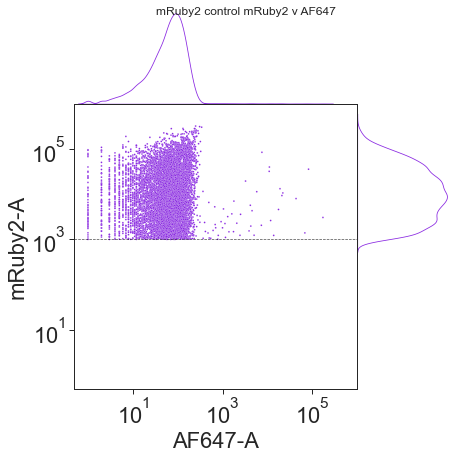

8642


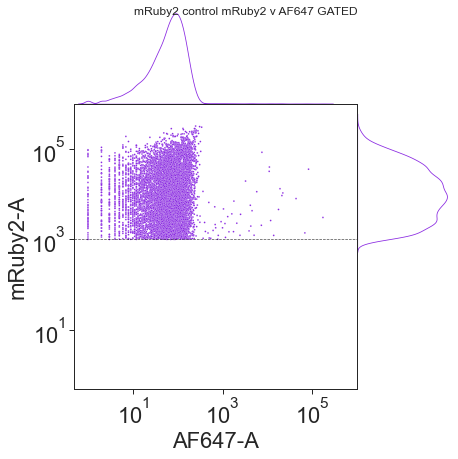

In [17]:
 
#set the hue, hue_order, palette 
hue = 'cond'; hue_order = None
palette = 'bright'

cond_list = pd.unique(data['cond'])

#Interate through the different conditions 
for cond in cond_list: 
    display(cond)
    data_now = data[ data['cond']== cond]
    plottitle = cond + ' mRuby2 v mGL'
    g = custom_density_plot(xcat='mGL-A',ycat='mRuby2-A', hue=hue, data=data_now, points = 10000, hue_order =cond_list, 
                            plottitle=plottitle,hline=[mRuby2gate],
                            palette=palette, alpha=0, type = ['scatter'], legend=False)
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

    data_now = data_mRuby2gated[ data_mRuby2gated['cond']== cond]
    plottitle = cond + ' mRuby2 v mGL' + ' GATED'
    g = custom_density_plot(xcat='AF647-A',ycat='mRuby2-A', hue=hue, data=data_now, points = 10000, hue_order =cond_list, 
                            plottitle=plottitle,hline=[mRuby2gate],
                            palette=palette, alpha=0, type = ['scatter'], legend=False)
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

    plottitle = cond + ' mRuby2 v AF647'
    g = custom_density_plot(xcat='AF647-A',ycat='mRuby2-A', hue=hue, data=data_now, points = 10000, hue_order =cond_list, 
                            plottitle=plottitle,hline=[mRuby2gate],
                            palette=palette, alpha=0, type = ['scatter'], legend=False)
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

    data_now = data_mRuby2gated[ data_mRuby2gated['cond']== cond]
    plottitle = cond + ' mRuby2 v AF647' + ' GATED'
    g = custom_density_plot(xcat='AF647-A',ycat='mRuby2-A', hue=hue, data=data_now, points = 10000, hue_order =cond_list, 
                            plottitle=plottitle,hline=[mRuby2gate],
                            palette=palette, alpha=0, type = ['scatter'], legend=False)
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')



## Protein vs. mRNA

'RNA v Protein Bioreplicates Combined mruby700'

10000


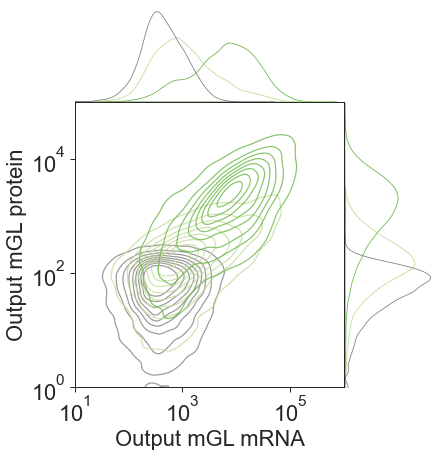

'RNA v Protein only 0601 mruby700'

6586


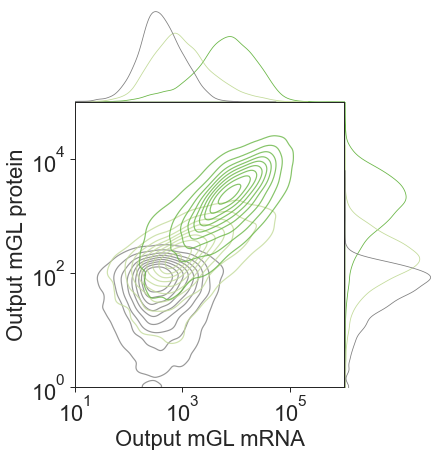

'RNA v Protein mruby7002025.05.08_EXP108'

8086


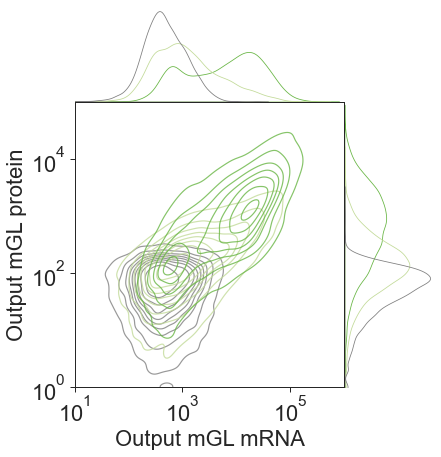

'RNA v Protein mruby700exp109_1'

1802


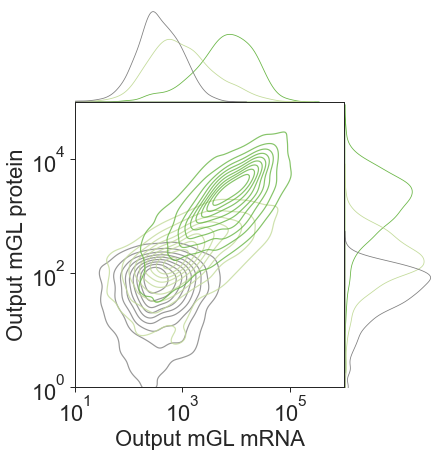

'RNA v Protein mruby700exp109_3'

1512


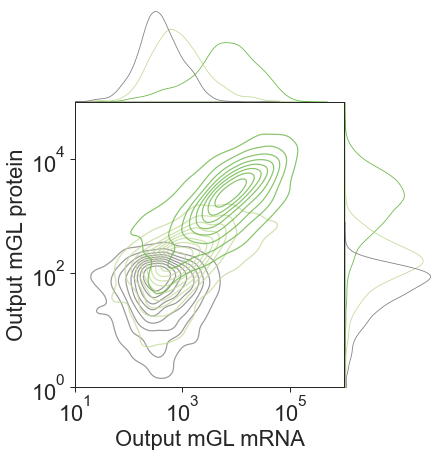

'RNA v Protein mruby700exp109_2'

2221


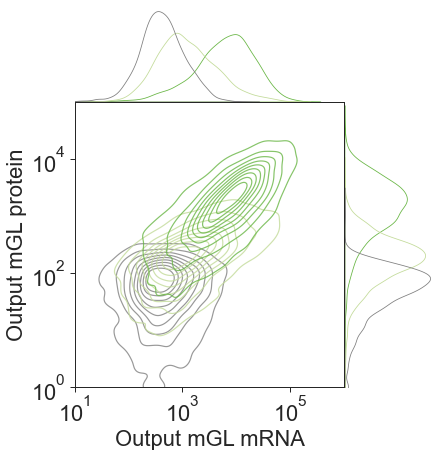

In [33]:
 
#set the hue, hue_order, palette 
hue = 'cond'; hue_order = None
palette = {
            'reporter only': 'grey',
           'reporter +ZFa': '#C3DB9A',
           'reporter +ZFa +Cre': '#69B645',
}

#data['Output mGL protein'] = data['mGL-A']
#data['Output mGL mRNA'] = data['AF647-A']

data_now = data_mRuby2gated[ data_mRuby2gated['cond'].isin(palette)]

# All bios
plottitle = 'RNA v Protein Bioreplicates Combined mruby' + str(mRuby2gate)
display(plottitle)
g = custom_density_plot(xcat='Output mGL mRNA',ycat='Output mGL protein', hue=hue, data=data_now, points = 10000, hue_order =palette, 
                        plottitle='', xlim=[1e1, 1e6], ylim=[1e0,1e5],
                        palette=palette, alpha=0, type = ['contour'], legend=False)
g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

# only 0601
plottitle = 'RNA v Protein only 0601 mruby' + str(mRuby2gate)
display(plottitle)
data_now2 = data_now[ data_now['bioreplicate']!='2025.05.08_EXP108' ]
g = custom_density_plot(xcat='Output mGL mRNA',ycat='Output mGL protein', hue=hue, data=data_now2, points = 10000, hue_order =palette, 
                        plottitle='', xlim=[1e1, 1e6], ylim=[1e0,1e5],
                        palette=palette, alpha=0, type = ['contour'], legend=False)
g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

#per bioreplicate
for bio in pd.unique(data_mRuby2gated['bioreplicate']):
    data_now3 = data_now[ data_now['bioreplicate']==bio ]
    plottitle = 'RNA v Protein mruby' + str(mRuby2gate) + bio
    display(plottitle)
    g = custom_density_plot(xcat='Output mGL mRNA',ycat='Output mGL protein', hue=hue, data=data_now3, points = 10000, hue_order =palette, 
                            plottitle='', xlim=[1e1, 1e6], ylim=[1e0,1e5],
                            palette=palette, alpha=0, type = ['contour'], legend=False)
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')


# Summary Plots ##

## Calculate stats

In [5]:
#data['Output mGL protein'] = data['mGL-A']
#data['Output mGL mRNA'] = data['AF647-A']

df = data_mRuby2gated
#Decide how to group. The last parameter will be the condition that it is group by by last ('well' or 'bioreplicate')
by = ['cond','bioreplicate'] #how to filter results, columns 
x = ['mGL-A', 'mRuby2-A', 'tagBFP-A','Output mGL protein','Output mGL mRNA','AF647-A'] #which parameter to calculate results on
stat = [sp.stats.gmean, np.median, np.std, np.mean] #statistics to calculater
s = calc_stats(df,by,x,stat) #calculate statistics 

display(pd.unique(s['bioreplicate']))
s.to_excel('FigS10_RNAFISH.xlsx',index=False)

array(['exp109_3', 'exp109_1', 'exp109_2'], dtype=object)

In [6]:
# Fold change 

normalize_map_mGL = {'test': 'test'}
normalize_map_AF647 = {'test': 'test'}
for bio in pd.unique( s['bioreplicate']):
       # get data for just that rep & and the cond of +ZF noCre
       data_rep = s[ (s['bioreplicate']==bio) & (s['cond']=='reporter +ZFa') ]
       #put out stats
       normalize_map_mGL[bio] = data_rep['mGL-A_gmean'].iloc[0]
        #put out stats
       normalize_map_AF647[bio] = data_rep['AF647-A_gmean'].iloc[0]
s['normalize_map_mGL'] = s['bioreplicate'].map(normalize_map_mGL)
s['normalize_map_AF647'] = s['bioreplicate'].map(normalize_map_AF647)
s['Fold Change mGL protein'] = s['mGL-A_gmean'] / s['normalize_map_mGL']
s['Fold Change mGL mRNA'] = s['AF647-A_gmean'] / s['normalize_map_AF647']
display(s)

#Calculate average fold change
df = s
x = ['Fold Change mGL protein','Fold Change mGL mRNA']
stat = [np.mean]
by = ['cond']
s_foldchange_means = calc_stats(df,by,x,stat)
s_foldchange_means['1/P fold change'] = 1/s_foldchange_means['Fold Change mGL protein_mean']
s_foldchange_means['1/m fold change'] = 1/s_foldchange_means['Fold Change mGL mRNA_mean']
display(s_foldchange_means)

,cond,bioreplicate,mGL-A_gmean,mGL-A_median,mGL-A_std,mGL-A_mean,mRuby2-A_gmean,mRuby2-A_median,mRuby2-A_std,mRuby2-A_mean,...,AF647-A_gmean,AF647-A_median,AF647-A_std,AF647-A_mean,Fraction,Count,normalize_map_mGL,normalize_map_AF647,Fold Change mGL protein,Fold Change mGL mRNA
0,mGL control,exp109_3,176.010990,177.0,731.843264,616.181818,1375.060620,1262.0,700.539117,1518.636364,...,827.102060,2786.0,4289.416307,3266.636364,1.000000,11,145.864872,879.55105,1.206672,0.940368
1,mRuby2 control,exp109_3,58.193649,59.0,1039.809091,259.942249,1877.125528,1543.0,6549.331801,3335.276596,...,65.615290,59.0,2593.704414,621.726444,1.000000,329,145.864872,879.55105,0.398956,0.074601
2,reporter +ZFa,exp109_1,167.264391,179.0,301.762133,273.649186,1662.006214,1358.5,5194.469428,2589.455701,...,942.567805,823.0,6692.832072,2730.630314,0.437017,5034,167.264391,942.567805,1.0,1.0
3,reporter +ZFa,exp109_2,164.891207,181.0,297.147643,257.884737,1539.659828,1271.0,3334.376932,2217.134624,...,1196.990638,1041.0,6768.789988,3046.563260,0.192812,2221,164.891207,1196.990638,1.0,1.0
4,reporter +ZFa,exp109_3,145.864872,161.0,292.523845,230.503283,1626.465617,1358.5,3507.758566,2330.417448,...,879.551050,788.0,5092.392199,2186.458959,0.370171,4264,145.864872,879.55105,1.0,1.0
5,reporter +ZFa +Cre,exp109_1,1625.236482,1887.0,3434.043902,2948.391883,1862.826506,1496.0,8094.000581,3303.121291,...,5801.212228,6511.5,14468.499374,11215.450366,0.471766,15030,167.264391,942.567805,9.716572,6.15469
6,reporter +ZFa +Cre,exp109_2,1368.099373,1530.0,2762.112126,2392.923974,1928.574434,1554.5,7646.956822,3412.903602,...,5757.131431,6527.5,15369.288824,11630.187482,0.212624,6774,164.891207,1196.990638,8.296982,4.809671
7,reporter +ZFa +Cre,exp109_3,1631.082455,1907.0,3498.951230,2959.476082,1871.728711,1495.0,7703.469499,3355.863948,...,5225.455248,6288.0,16687.500335,11443.543909,0.315609,10055,145.864872,879.55105,11.182147,5.941048
8,reporter only,exp109_1,43.839549,54.0,48.882478,64.883463,1761.081831,1400.5,4789.680626,2879.843507,...,356.421522,346.0,639.628323,561.970588,0.273611,1802,167.264391,942.567805,0.262097,0.378139
9,reporter only,exp109_2,45.793751,58.0,87.811627,68.568765,1737.804857,1352.5,5685.399766,2851.851467,...,403.439389,391.0,802.505628,638.838020,0.496811,3272,164.891207,1196.990638,0.277721,0.337045


,cond,Fold Change mGL protein_mean,Fold Change mGL mRNA_mean,Count,1/P fold change,1/m fold change
0,mGL control,1.206672,0.940368,1,0.828726,1.063413
1,mRuby2 control,0.398956,0.074601,1,2.506543,13.404666
2,reporter +ZFa,1.000000,1.000000,3,1.000000,1.000000
3,reporter +ZFa +Cre,9.731900,5.635136,3,0.102755,0.177458
4,reporter only,0.287038,0.379196,3,3.483855,2.637156
5,untransfected,5.744471,3.448501,3,0.174080,0.289981


## Plot summary plots

### Summary Plots combined

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

reporter only v.s. reporter +ZFa: t-test independent samples, P_val=7.591e-05 stat=-1.667e+01
reporter +ZFa v.s. reporter +ZFa +Cre: t-test independent samples, P_val=9.162e-05 stat=-1.589e+01


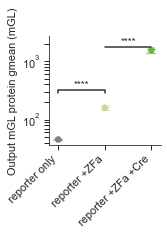

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

reporter only v.s. reporter +ZFa: t-test independent samples, P_val=3.026e-03 stat=-6.420e+00
reporter +ZFa v.s. reporter +ZFa +Cre: t-test independent samples, P_val=2.544e-05 stat=-2.196e+01


<Figure size 432x288 with 0 Axes>

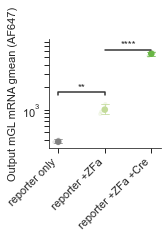

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

reporter only v.s. reporter +ZFa: t-test independent samples, P_val=1.415e-03 stat=-7.861e+00
reporter +ZFa v.s. reporter +ZFa +Cre: t-test independent samples, P_val=2.165e-02 stat=-3.656e+00


<Figure size 432x288 with 0 Axes>

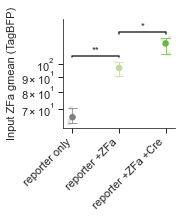

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

reporter only v.s. reporter +ZFa: t-test independent samples, P_val=2.277e-06 stat=-4.025e+01
reporter +ZFa v.s. reporter +ZFa +Cre: t-test independent samples, P_val=4.680e-04 stat=-1.048e+01


<Figure size 432x288 with 0 Axes>

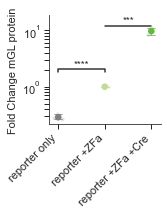

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

reporter only v.s. reporter +ZFa: t-test independent samples, P_val=1.475e-05 stat=-2.519e+01
reporter +ZFa v.s. reporter +ZFa +Cre: t-test independent samples, P_val=3.738e-04 stat=-1.111e+01


<Figure size 432x288 with 0 Axes>

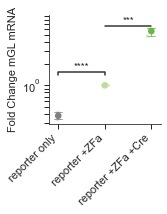

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

reporter only v.s. reporter +ZFa: t-test independent samples, P_val=1.757e-01 stat=-1.643e+00
reporter +ZFa v.s. reporter +ZFa +Cre: t-test independent samples, P_val=5.600e-02 stat=-2.667e+00


<Figure size 432x288 with 0 Axes>

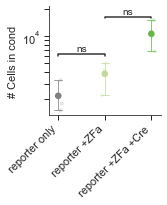

<Figure size 432x288 with 0 Axes>

In [7]:
#Plot summary plot for the desired statistics
# Make key for summary stats 
stat_label = { 'mGL-A_gmean': 'Output mGL protein gmean (mGL)',
    'AF647-A_gmean': 'Output mGL mRNA gmean (AF647)', 
    'tagBFP-A_gmean': 'Input ZFa gmean (TagBFP)', 
    'Fold Change mGL protein':'Fold Change mGL protein',
    'Fold Change mGL mRNA':'Fold Change mGL mRNA', 
    'Count': '# Cells in cond'
    }

palette = {
            'reporter only': 'grey',
           'reporter +ZFa': '#C3DB9A',
           'reporter +ZFa +Cre': '#69B645',
}


hue= None; hue_order = None
order = palette
x = 'cond' 
yscale= 'log'

#Set p-value significance comparisons 
pairs = [
       ['reporter only', 'reporter +ZFa'],
       ['reporter +ZFa', 'reporter +ZFa +Cre']
]

for stat in stat_label:
    y = stat # set the stat to plot
    plottitle = ''
    #Size
    xsize =2; ysize = 2
    fontsize=11
    plt.figure(figsize=[xsize, ysize] )
    g = summary_plot( x=x, y=y, hue=hue, data=s, yscale =yscale, pairs=pairs, 
                    ylabel = stat_label[stat], xlabel='',  xticklabels=True,
                     x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle,
                    fontsize=fontsize )
    plottitle = stat
    g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

### Summary Plots new colors

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

reporter only v.s. reporter +ZFa: t-test independent samples, P_val=7.591e-05 stat=-1.667e+01
reporter +ZFa v.s. reporter +ZFa +Cre: t-test independent samples, P_val=9.162e-05 stat=-1.589e+01


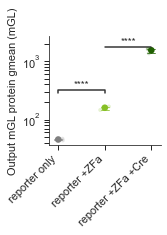

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

reporter only v.s. reporter +ZFa: t-test independent samples, P_val=3.026e-03 stat=-6.420e+00
reporter +ZFa v.s. reporter +ZFa +Cre: t-test independent samples, P_val=2.544e-05 stat=-2.196e+01


<Figure size 432x288 with 0 Axes>

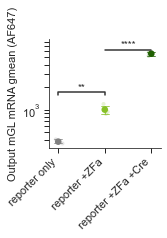

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

reporter only v.s. reporter +ZFa: t-test independent samples, P_val=1.415e-03 stat=-7.861e+00
reporter +ZFa v.s. reporter +ZFa +Cre: t-test independent samples, P_val=2.165e-02 stat=-3.656e+00


<Figure size 432x288 with 0 Axes>

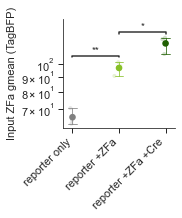

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

reporter only v.s. reporter +ZFa: t-test independent samples, P_val=2.277e-06 stat=-4.025e+01
reporter +ZFa v.s. reporter +ZFa +Cre: t-test independent samples, P_val=4.680e-04 stat=-1.048e+01


<Figure size 432x288 with 0 Axes>

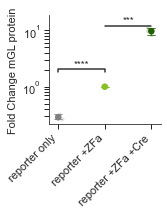

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

reporter only v.s. reporter +ZFa: t-test independent samples, P_val=1.475e-05 stat=-2.519e+01
reporter +ZFa v.s. reporter +ZFa +Cre: t-test independent samples, P_val=3.738e-04 stat=-1.111e+01


<Figure size 432x288 with 0 Axes>

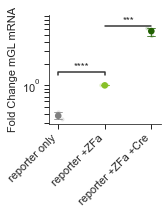

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

reporter only v.s. reporter +ZFa: t-test independent samples, P_val=1.757e-01 stat=-1.643e+00
reporter +ZFa v.s. reporter +ZFa +Cre: t-test independent samples, P_val=5.600e-02 stat=-2.667e+00


<Figure size 432x288 with 0 Axes>

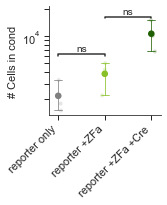

<Figure size 432x288 with 0 Axes>

In [8]:
#Plot summary plot for the desired statistics
# Make key for summary stats 
stat_label = { 'mGL-A_gmean': 'Output mGL protein gmean (mGL)',
    'AF647-A_gmean': 'Output mGL mRNA gmean (AF647)', 
    'tagBFP-A_gmean': 'Input ZFa gmean (TagBFP)', 
    'Fold Change mGL protein':'Fold Change mGL protein',
    'Fold Change mGL mRNA':'Fold Change mGL mRNA', 
    'Count': '# Cells in cond'
    }

palette = {
            'reporter only': 'grey',
           'reporter +ZFa': '#87C027',
           'reporter +ZFa +Cre': '#206002',
}


hue= None; hue_order = None
order = palette
x = 'cond' 
yscale= 'log'

#Set p-value significance comparisons 
pairs = [
       ['reporter only', 'reporter +ZFa'],
       ['reporter +ZFa', 'reporter +ZFa +Cre']
]

s_now = s
for stat in stat_label:
    y = stat # set the stat to plot
    plottitle = ''
    #Size
    xsize =2; ysize = 2
    fontsize=11
    plt.figure(figsize=[xsize, ysize] )
    g = summary_plot( x=x, y=y, hue=hue, data=s_now, yscale =yscale, pairs=pairs, 
                    ylabel = stat_label[stat], xlabel='',  xticklabels=True,
                     x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle,
                    fontsize=fontsize )
    plottitle = stat + ' EXP109only'
    g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')